In [1]:
# install.packages("partykit")
# install.packages("qgam")

In [2]:
require(readr)
require(ggplot2)
require(partykit)
require(mgcv)
require(qgam)
require(dplyr)

Loading required package: readr

Loading required package: ggplot2

Loading required package: partykit

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.

Loading required package: qgam

Loading required package: dplyr


Attaching package: 'dplyr'


The following object is masked from 'package:nlme':

    collapse


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
getwd()

[1] "E:/LangOn/OntoDeepLex/notebooks/06-cns"

In [4]:
m2=read_csv("../../data/cns/m2_cld.csv")
m2$lexicality = factor(m2$lexicality, labels=c("Word", "NonWord"))
m2$ErrCat = factor(m2$ERR > 50, levels=c(T, F), labels=c("ErrHigh", "ErrLow"))

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  .default = col_double(),
  word = col_character(),
  C1 = col_character(),
  C2 = col_character()
)

See spec(...) for full column specifications.



In [5]:
dim(m2)

[1] 20038    31

In [6]:
head(m2)

X1,id,word,lexicality,N,RT,RTSD,zRT,zRTSD,ERR,...,C1nSense,C2Frequency,C2FamilySize,C2Friends,C2FamilyFrequency,C2RE,C2Strokes,C2Entropy,C2nSense,ErrCat
<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,200001,一切,Word,40,610.6202,104.6158,-0.744271613,0.2949250,0.000000,...,10,555.2889,58,19,710.2446,5.972,4,2.6764,18,ErrLow
10165,210166,土切,NonWord,40,974.9763,332.4795,0.622558680,1.2108042,2.439024,...,9,555.2889,58,19,710.2446,5.972,4,2.6764,18,ErrLow
10777,210778,手切,NonWord,26,908.2115,357.5556,0.363349348,1.0373223,36.585366,...,6,555.2889,58,19,710.2446,5.972,4,2.6764,18,ErrLow
11806,211807,<U+7535>切,NonWord,34,919.4412,371.6196,0.113097323,0.8828764,15.000000,...,8,555.2889,58,19,710.2446,5.972,4,2.6764,18,ErrLow
12624,212625,<U+706F>切,NonWord,40,831.8628,204.8595,0.002339615,0.5828467,2.439024,...,6,555.2889,58,19,710.2446,5.972,4,2.6764,18,ErrLow
4515,204516,<U+4EB2>切,Word,39,675.6721,159.8018,-0.519863128,0.5995777,2.500000,...,8,555.2889,58,19,710.2446,5.972,4,2.6764,18,ErrLow


Warning message:
"Removed 1 rows containing non-finite values (stat_density)."


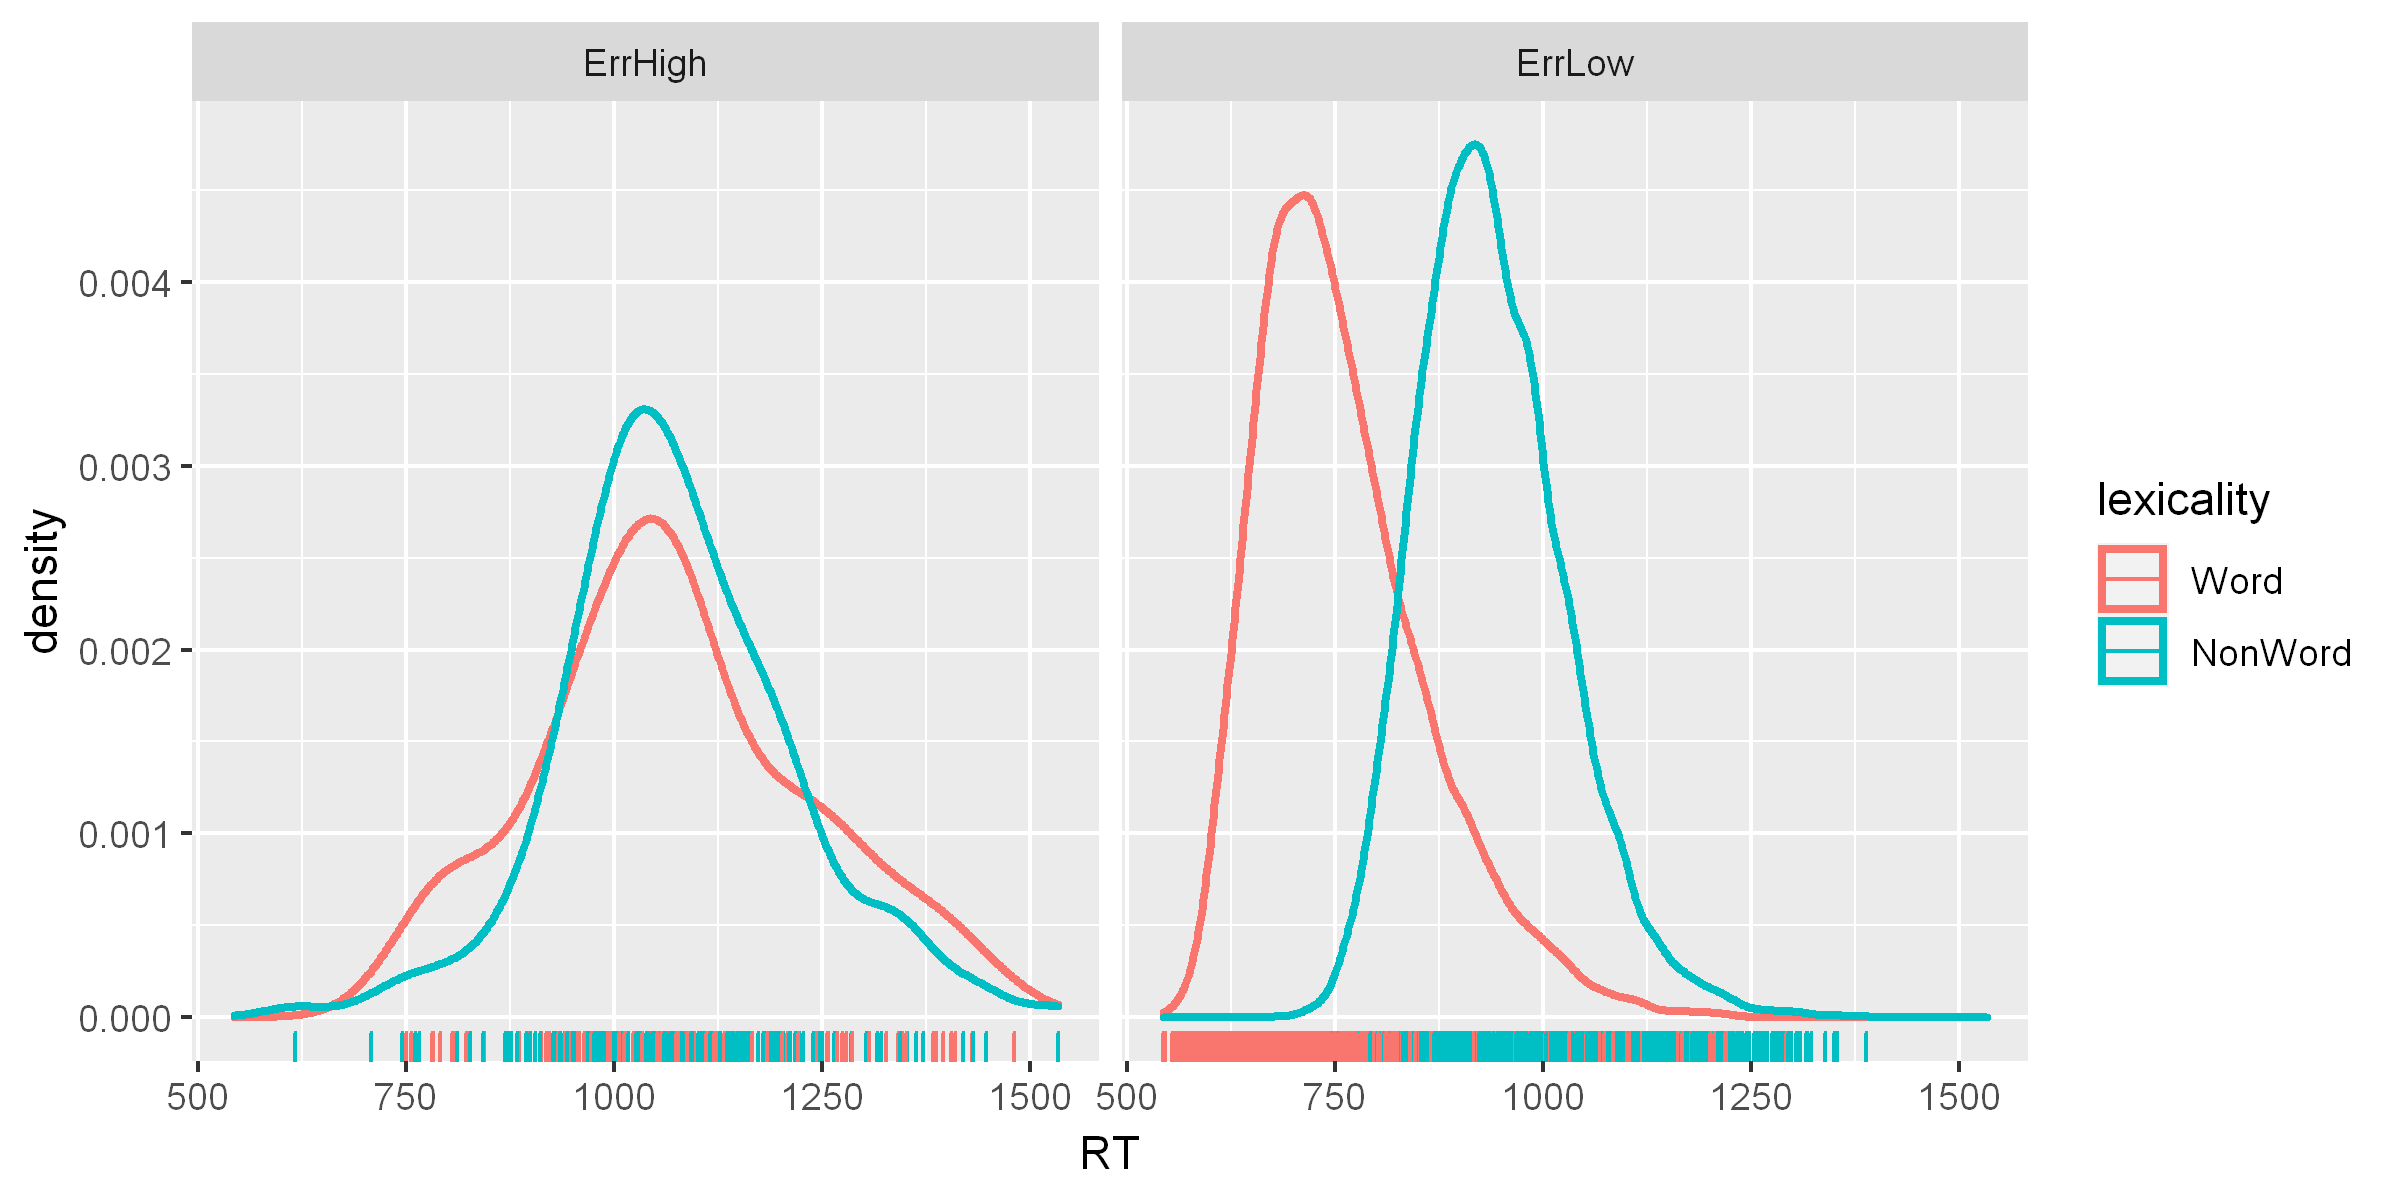

In [7]:
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res=300)
ggplot(m2, aes(x=RT, color=lexicality)) + 
    geom_rug() + 
    geom_density(lwd=1) + 
    facet_wrap(~ErrCat)

In [20]:
m2_nonword = m2 %>% 
          subset(lexicality=="NonWord") %>%
          select(c("RT", grep("C[12].", colnames(m2)))) %>%
          mutate(RT = -1000/RT) 
head(m2_nonword)

RT,C1Frequency,C1FamilySize,C1Friends,C1FamilyFrequency,C1RE,C1Strokes,C1Entropy,C1nSense,C2Frequency,C2FamilySize,C2Friends,C2FamilyFrequency,C2RE,C2Strokes,C2Entropy,C2nSense
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1.025666,106.8840,93,95,111.3788,2.2189,3,NA,9,555.2889,58,19,710.2446,5.972,4,2.6764,18
-1.101065,1853.4568,297,299,2004.4403,4.2928,4,NA,6,555.2889,58,19,710.2446,5.972,4,2.6764,18
-1.087617,1172.8642,229,229,1529.6961,6.5329,5,2.8461,8,555.2889,58,19,710.2446,5.972,4,2.6764,18
-1.202121,163.0173,80,80,155.6412,2.2152,6,NA,6,555.2889,58,19,710.2446,5.972,4,2.6764,18
-1.178846,405.0667,101,100,353.0838,5.3482,9,2.4879,9,555.2889,58,19,710.2446,5.972,4,2.6764,18
-1.047403,108.2568,33,33,111.1045,5.1842,10,NA,8,555.2889,58,19,710.2446,5.972,4,2.6764,18


In [21]:
names(m2_nonword)

[1] "RT"                "C1Frequency"       "C1FamilySize"     
 [4] "C1Friends"         "C1FamilyFrequency" "C1RE"             
 [7] "C1Strokes"         "C1Entropy"         "C1nSense"         
[10] "C2Frequency"       "C2FamilySize"      "C2Friends"        
[13] "C2FamilyFrequency" "C2RE"              "C2Strokes"        
[16] "C2Entropy"         "C2nSense"

In [ ]:
cforest(RT~C1Frequency+C1FamilySize, data=m2_nonword)